In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from config import api_key
import scipy.stats as stats
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [24]:
#Read in each csv file 
fire_data_1 = pd.read_csv("Data/us_fires_1.csv", low_memory=False, encoding='latin-1')
fire_data_2 = pd.read_csv("Data/us_fires_2.csv", low_memory=False, encoding='latin-1')
fire_data_3 = pd.read_csv("Data/us_fires_3.csv", low_memory=False, encoding='latin-1')
fire_data_4 = pd.read_csv("Data/us_fires_4.csv", low_memory=False, encoding='latin-1')
fire_data_5 = pd.read_csv("Data/us_fires_5.csv", low_memory=False, encoding='latin-1')
fire_data_6 = pd.read_csv("Data/us_fires_6.csv", low_memory=False, encoding='latin-1')
fire_data_7 = pd.read_csv("Data/us_fires_7.csv", low_memory=False, encoding='latin-1')

#Combine the data frames into one 
all_data = pd.concat([fire_data_1, fire_data_2, fire_data_3, fire_data_4, 
                      fire_data_5, fire_data_6, fire_data_7], axis=0)

#Drop unnecessary columns 
cleaned_df = all_data.drop(['objectid', 'fod_id', 'fpa_id', 'source_system_type', 'source_system', 'nwcg_reporting_agency',
              'nwcg_reporting_unit_id', 'nwcg_reporting_unit_name', 'source_reporting_unit', 'owner_code', 
               'owner_descr', 'fips_code', 'fips_name', 'local_fire_report_id', 'local_incident_id',
              'fire_code', 'ics_209_incident_number', 'ics_209_name', 'mtbs_id', 'complex_name',
              'mtbs_fire_name', 'discovery_doy', 'discovery_time', 'stat_cause_code', 'cont_doy',
              'cont_time', 'fire_name', 'source_reporting_unit_name', 'cont_date', 'discovery_date','county'], axis=1)

#Rename columns 
cleaned_df.columns = ['Year', 'Cause', 'Size', 'Size Class','Latitude', 'Longitude', 'State']

In [25]:
#Pie Chart
cleaned_df.Cause.unique()
Cause = cleaned_df.set_index('Size')['Size Class']
Cause.value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: Size Class, dtype: int64

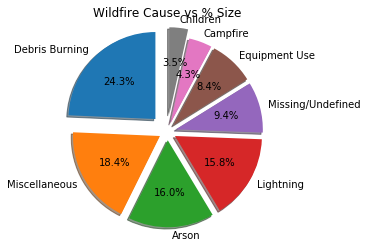

In [26]:
Size_Class= cleaned_df.set_index('Size')['Cause']
Size_Class.value_counts()[:13]
Size_Class.value_counts().index[:8]
labels = Size_Class.value_counts().index[:8]
sizes =Size_Class.value_counts()[:8]
explode = (0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
plt.pie(x=sizes, labels=labels,explode= explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Wildfire Cause vs % Size")
plt.savefig('Wildfire Cause vs % Size.png')
plt.show()

In [27]:
#Scattred Plot
len(Size_Class.value_counts().index)
x = np.arange(0,len(Size_Class.value_counts().index))
y = Size_Class.value_counts()

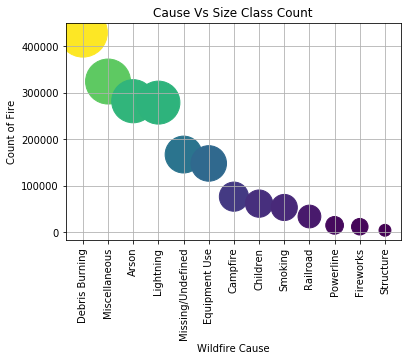

In [28]:
plt.figure(figsize=(6,4))
area= Size_Class.value_counts()**0.6
color = Size_Class.value_counts()
plt.scatter(x, y, s=area, c= color)
plt.xticks(x, Size_Class.value_counts().index, rotation='vertical')
plt.grid(True)
plt.ylabel('Count of Fire')
plt.xlabel('Wildfire Cause')
plt.title('Cause Vs Size Class Count')
plt.savefig('Cause vs Size Count.png')
plt.show()

In [29]:
fire_size = cleaned_df[cleaned_df["Year"] == 2015]
fire_size.head()

,Year,Cause,Size,Size Class,Latitude,Longitude,State
289011,2015,Lightning,0.10,A,45.934167,-113.020833,MT
289012,2015,Lightning,6313.00,G,45.515278,-113.245278,MT
289013,2015,Lightning,0.25,A,45.727222,-112.943889,MT
289014,2015,Lightning,0.10,A,45.455556,-113.749722,MT
289015,2015,Miscellaneous,0.10,A,44.416667,-112.843333,MT


In [30]:
#Heat Map of the United States
gmaps.configure(api_key)

locations = fire_size[["Latitude", "Longitude"]]
size = fire_size["Size"].astype(float)

# Plot Heatmap
fig = gmaps.Map()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=size,
                                dissipating=False, max_intensity=12,
                                point_radius=0.1)

# Add layer
fig.add_layer(heat_layer)

fig

Map(configuration={'api_key': '6c5091f4ee3e2c43d28cf7e7d3fd24d5'}, data_bounds=[(26.375291362447726, -129.4397…

In [32]:
# Create a group based on the values in the 'state' column
by_state = cleaned_df.groupby('State')

In [33]:
# Count number of fires/state, reset index, and rename columns
by_state_1 = by_state[['Size']].sum()
by_state_1 = by_state_1.sort_values('Size', ascending=False)
by_state_1 = by_state_1.reset_index()
by_state_1.columns = ['State','Size of Fire']

by_state_1.head()

,State,Size of Fire
0,AK,3.223309e+07
1,ID,1.368433e+07
2,CA,1.274586e+07
3,TX,9.786218e+06
4,NV,9.015855e+06


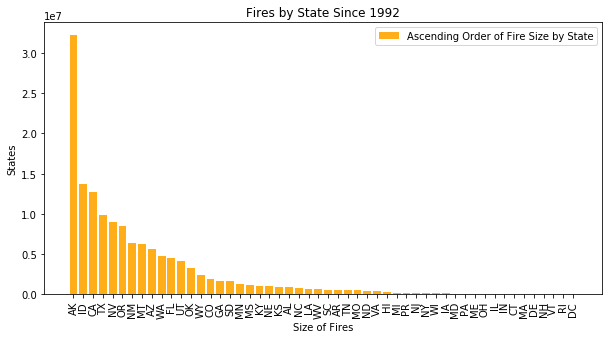

In [34]:
#tick locations
x_axis = np.arange(len(by_state_1))
tick_locations = [value for value in x_axis]# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, by_state_1['Size of Fire'], color='orange', alpha=0.9, align="center")
plt.xticks(tick_locations, by_state_1["State"], rotation="vertical")
plt.ylabel('States')
plt.xlabel('Size of Fires')
plt.title('Fires by State Since 1992')

plt.legend(['Ascending Order of Fire Size by State'])

plt.savefig("SizeNational.png")
plt.show()


In [35]:
#Pull top five states into separate df's
ak = by_state_1[by_state_1["State"] == "AK"]
ida= by_state_1[by_state_1["State"] == "ID"]
ca = by_state_1[by_state_1["State"] == "CA"]
tx = by_state_1[by_state_1["State"] == "TX"]
nv = by_state_1[by_state_1["State"] == "NV"]

In [36]:
#Combine top five states into 1df.
top_five_states_1 = pd.concat([ak,ida,ca,tx,nv], axis=0)
#drop unwanted data
#top_five_states_1 = top_five_states_1.drop(['index'], axis=1)
# rename columns
top_five_states_1.columns = ['State', 'Size of Fires']

top_five_states_1.head()

,State,Size of Fires
0,AK,3.223309e+07
1,ID,1.368433e+07
2,CA,1.274586e+07
3,TX,9.786218e+06
4,NV,9.015855e+06


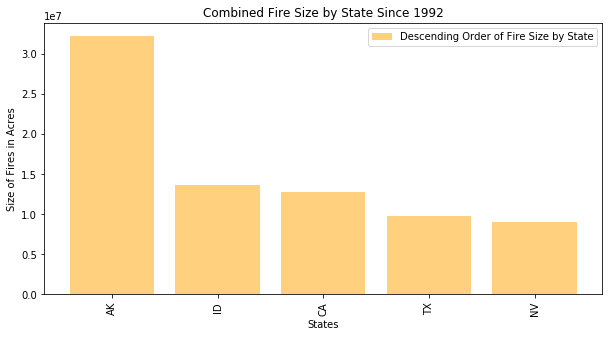

In [37]:
# Set x axis and tick locations for new graph
x_axis_2 = np.arange(len(top_five_states_1))
tick_locations_2 = [value for value in x_axis_2]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis_2, top_five_states_1['Size of Fires'], color='orange', alpha=.5, align="center")
plt.xticks(tick_locations_2, top_five_states_1["State"], rotation="vertical")
plt.ylabel('Size of Fires in Acres')
plt.xlabel('States')
plt.title('Combined Fire Size by State Since 1992')

plt.legend(['Descending Order of Fire Size by State'])
plt.savefig("SizeTop.png")
plt.show()


In [39]:
# Create a group based on the values in the 'state' column
by_state = cleaned_df.groupby('State')

# Count number of fires/state, reset index, and rename columns
by_state = by_state[['Year']].count()
by_state = by_state.sort_values('Year', ascending=False)
by_state = by_state.reset_index()
by_state.columns = ['State','Number of Fires']

by_state.head()

,State,Number of Fires
0,CA,189550
1,GA,168867
2,TX,142021
3,NC,111277
4,FL,90261


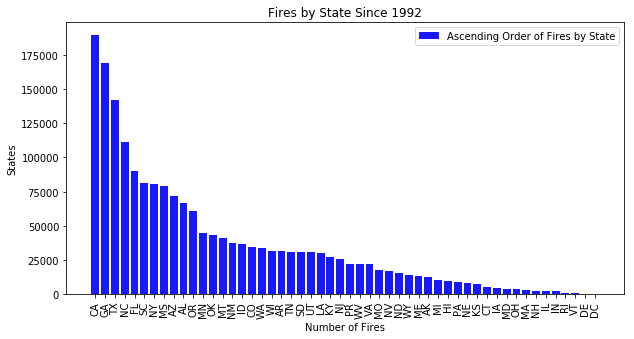

In [40]:
# Set x axis and tick locations
x_axis = np.arange(len(by_state))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, by_state['Number of Fires'], color='b', alpha=0.9, align="center")
plt.xticks(tick_locations, by_state["State"], rotation="vertical")
plt.ylabel('States')
plt.xlabel('Number of Fires')
plt.title('Fires by State Since 1992')

plt.legend(['Ascending Order of Fires by State'])
plt.savefig("NumberNational.png")
plt.show()



In [41]:
#Pull top five states into separate df's
cali = by_state[by_state["State"] == "CA"]
ga = by_state[by_state["State"] == "GA"]
tx = by_state[by_state["State"] == "TX"]
nc = by_state[by_state["State"] == "NC"]
fl = by_state[by_state["State"] == "FL"]
#Combine top five states into 1df.
top_five_states = pd.concat([cali,ga,tx,nc,fl], axis=0)
#drop unwanted data
#top_five_states = top_five_states.drop(['index'], axis=1)
# rename columns
top_five_states.columns = ['State', 'Number of Fires']

top_five_states.head()

,State,Number of Fires
0,CA,189550
1,GA,168867
2,TX,142021
3,NC,111277
4,FL,90261


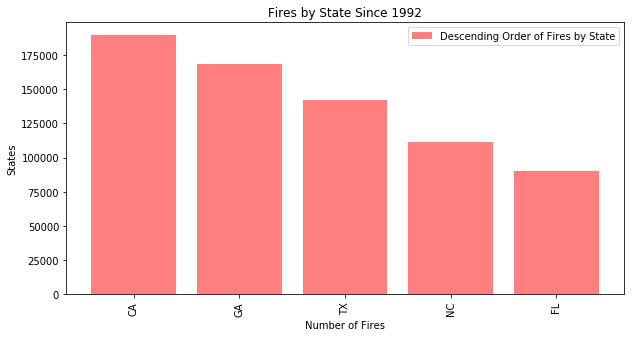

In [42]:
# Set x axis and tick locations for new graph
x_axis_2 = np.arange(len(top_five_states))
tick_locations_2 = [value for value in x_axis_2]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis_2, top_five_states['Number of Fires'], color='r', alpha=.5, align="center")
plt.xticks(tick_locations_2, top_five_states["State"], rotation="vertical")
plt.ylabel('States')
plt.xlabel('Number of Fires')
plt.title('Fires by State Since 1992')

plt.legend(['Descending Order of Fires by State'])
plt.savefig("NumberTop.png")

plt.show()

In [43]:
#Rename columns 
cleaned_df.columns = ['Year', 'Cause', 'Size', 'Size Class','Latitude', 'Longitude', 'State']

#Sort data by state 
df = cleaned_df.sort_values('State', ascending=True)
df.head()

,Year,Cause,Size,Size Class,Latitude,Longitude,State
162099,1994,Miscellaneous,0.5,B,64.883331,-147.966659,AK
210664,1993,Debris Burning,0.5,B,65.566300,-144.919100,AK
161788,1993,Miscellaneous,0.1,A,61.966667,-149.433334,AK
210663,1993,Lightning,4470.0,F,65.832900,-147.402500,AK
210662,1993,Lightning,5530.0,G,64.199700,-141.085600,AK


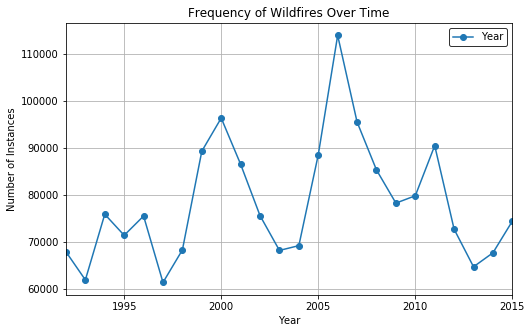

In [44]:
df['Year'].value_counts(sort=False).plot(kind="line",marker='o', figsize=(8,5))
plt.title('Frequency of Wildfires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
plt.grid(b=True)
plt.savefig('Frequency of Wildfires Overtime.png')
plt.show()


In [45]:
df = cleaned_df.sort_values('Year', ascending=True)
state_group = df.groupby('Size')
df.head()

,Year,Cause,Size,Size Class,Latitude,Longitude,State
91277,1992,Arson,15.0,C,31.494948,-90.087916,MS
161559,1992,Lightning,1.0,B,48.616250,-117.990230,WA
161560,1992,Lightning,0.1,A,48.195880,-117.766750,WA
161561,1992,Arson,0.5,B,48.583490,-118.091330,WA
161562,1992,Children,0.1,A,48.705520,-118.008010,WA


In [46]:
# Create a group based on the values in the 'state' column
state_group = df.groupby('State')
#state_group.head()
count_state = state_group['State'].count()

In [47]:
state_count = count_state
fire_size = state_group['Size'].mean()
Corr_df = pd.DataFrame()
Corr_df['Frequency'] = state_count
Corr_df['Avg Fire Size'] = fire_size
Corr_df

,Frequency,Avg Fire Size
State,,
AK,12843,2509.779198
AL,66570,13.828230
AR,31663,16.072761
AZ,71586,77.901837
CA,189550,67.242725
CO,34157,53.936502
CT,4976,2.259508
DC,66,0.492424
DE,171,28.266959


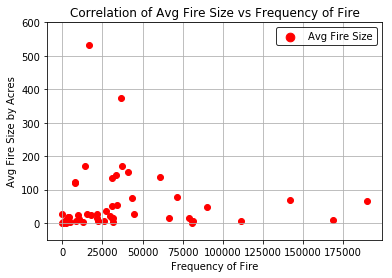

In [48]:
plt.clf()
plt.scatter(Corr_df['Frequency'],Corr_df['Avg Fire Size'], marker = 'o', color = 'red')
plt.title('Correlation of Avg Fire Size vs Frequency of Fire')
plt.xlabel('Frequency of Fire')
plt.ylabel('Avg Fire Size by Acres')
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
plt.grid(b=True)
plt.ylim(-50,600)
plt.savefig('Correlation.png')
plt.show()

In [49]:
fire_size = df[df["Year"] == 2015]
fire_size.head()

,Year,Cause,Size,Size Class,Latitude,Longitude,State
44444,2015,Miscellaneous,0.01,A,37.350000,-94.830000,KS
44443,2015,Miscellaneous,0.20,A,40.091250,-123.676000,CA
44802,2015,Miscellaneous,0.50,B,33.436642,-81.550209,SC
44803,2015,Miscellaneous,1.00,B,29.450000,-82.548300,FL
44268,2015,Miscellaneous,0.10,A,40.814400,-73.012100,NY


In [51]:
#Filter out any environmental causes of wildfires
lightning = df[df["Cause"] == "Lightning"]

#Filter out earliest and latest years
oldest = lightning[lightning["Year"] == 1993]
newest = lightning[lightning["Year"] == 2015]

lightning.head()
#Count the number of wildfires for 1993 and 2015 - for 'observed'
chi_observed_oldest = oldest['Year'].count()
chi_observed_newest = newest['Year'].count()

#Calculate the 'Expected' number of wildfires
total_fires = lightning['Year'].count()
total_fires/23

#Create a data frame for the chi square test
chi_df = pd.DataFrame(lightning.groupby(by = 'Year')['Cause'].count()).reset_index()
chi_df['Expected'] = chi_df['Cause'].sum() / chi_df.shape[0]
chi_df.columns = ['Year', 'Observed', 'Expected']
chi_df

critical_value = stats.chi2.ppf(q = 0.95, df = 22)
critical_value

stats.chisquare(chi_df['Observed'], chi_df['Expected'])

Power_divergenceResult(statistic=13284.483445135527, pvalue=0.0)